Here we have used the  keras Sequential model to predict the price of ETC and BTC. This model used LSTM (long short term memory) layer, Droput layer to avoid overfitting, and Dense layer. In this model the model predicted the price for one day after each 60 days


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [3]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
#from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

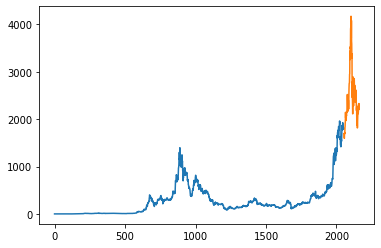

In [11]:
eth_data=pd.read_csv('/content/gdrive/My Drive/data/coin_Ethereum.csv')
train=eth_data[0:int(len(eth_data)*0.95)]
test=eth_data[int(len(eth_data)*0.95)+1:len(eth_data)]
plt.plot(train['Close'])
plt.plot(test['Close'])

In [13]:


eth_data=pd.read_csv('/content/gdrive/My Drive/data/coin_Ethereum.csv')
data=eth_data[0:int(len(eth_data)*0.95)]
scaler=MinMaxScaler(feature_range=(0,1))
#first we normalized the data because cryptocurrency prices can be high numbers so we scaled them to be numbers between 0 and 1
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days=60
x_train, y_train=[], []
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
x_train, y_train=np.array(x_train),np.array(y_train)

model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25
63/63 [==============================] - 12s 94ms/step - loss: 0.0054
Epoch 2/25
63/63 [==============================] - 7s 113ms/step - loss: 0.0023
Epoch 3/25
63/63 [==============================] - 6s 91ms/step - loss: 0.0018
Epoch 4/25
63/63 [==============================] - 6s 91ms/step - loss: 0.0018
Epoch 5/25
63/63 [==============================] - 6s 91ms/step - loss: 0.0017
Epoch 6/25
63/63 [==============================] - 6s 91ms/step - loss: 0.0017
Epoch 7/25
63/63 [==============================] - 6s 92ms/step - loss: 0.0017
Epoch 8/25
63/63 [==============================] - 6s 92ms/step - loss: 0.0012
Epoch 9/25
63/63 [==============================] - 6s 92ms/step - loss: 0.0014
Epoch 10/25
63/63 [==============================] - 6s 91ms/step - loss: 0.0015
Epoch 11/25
63/63 [==============================] - 6s 92ms/step - loss: 0.0012
Epoch 12/25
63/63 [==============================] - 6s 91ms/step - loss: 0.0013
Epoch 13/25
63/63 [================

13/13 [==============================] - 3s 40ms/step


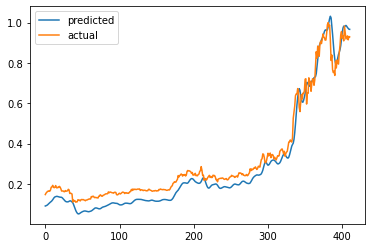

In [14]:
test_data=scaled_data[int(len(scaled_data)*0.8):len(scaled_data)]

model_inputs=scaled_data[len(scaled_data)-len(test_data)-prediction_days:]
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.fit_transform(model_inputs)
x_train=list(x_train)
x_test=[]
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test=np.array(x_test)
prediction_prices=model.predict(x_test)
test_data=scaler.inverse_transform(test_data)
prediction_prices=scaler.inverse_transform(prediction_prices)

plt.plot(prediction_prices,label='predicted')
plt.plot(test_data,label='actual')
plt.legend()


From this we can see that the results of this model are not good as the predicted prices are almost the same as the actual prices but they are shifted in the right and they are slightly lowe. When they are shifted to the right it means that it just follows the actual prices only after the changes happen. For example if the actual price rises it will rise after that but it did not predict any price fluctuation befor the actual price droped or increased

4/4 [==============================] - 1s 5ms/step


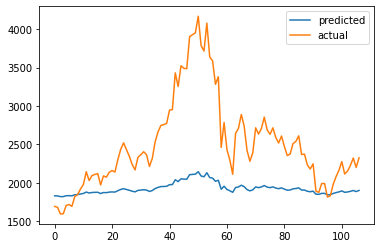

In [15]:
real_data=eth_data[int(len(eth_data)*0.95)+1:len(eth_data)]
real_data=real_data['Close']
real_data=scaler.fit_transform(real_data.values.reshape(-1,1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
real_data=scaler.inverse_transform(real_data)


plt.plot(prediction,label='predicted')
plt.plot(real_data,label='actual')
plt.legend()

After testing the model on the unknown data we can see that there was a problem with scaling the data as predicted price is similar to the actual price but it is scaled differently

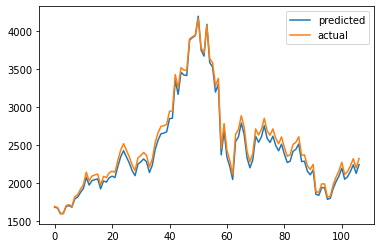

In [16]:
prediction=MinMaxScaler(feature_range=(1600,4200)).fit_transform(prediction.reshape(-1,1))
plt.plot(prediction,label='predicted')
plt.plot(real_data,label='actual')
plt.legend()

Therefore, we scaled the predicted price so that the prices are in the range of (1600,4200) and now the predicted and actual prices are almost identical. However tehre are some differences and w can see that sometimes the blue line was on the left side of the orange line which meancs that sometimes the model predicted the price to increase/drop before it actually increased/dropped

In [186]:
np.sum((real_data-prediction)**2)

110629.68873841736

Then the same process is repeated for the Bitcoin data with the same outcome

In [8]:


btc_data=pd.read_csv('/content/gdrive/My Drive/data/coin_Bitcoin.csv')
data=btc_data[0:int(len(btc_data)*0.9)]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days=60
x_train, y_train=[], []
for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
x_train, y_train=np.array(x_train),np.array(y_train)

model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25
83/83 [==============================] - 15s 111ms/step - loss: 0.0052
Epoch 2/25
83/83 [==============================] - 7s 88ms/step - loss: 0.0021
Epoch 3/25
83/83 [==============================] - 7s 89ms/step - loss: 0.0019
Epoch 4/25
83/83 [==============================] - 7s 87ms/step - loss: 0.0016
Epoch 5/25
83/83 [==============================] - 7s 87ms/step - loss: 0.0015
Epoch 6/25
83/83 [==============================] - 7s 87ms/step - loss: 0.0016
Epoch 7/25
83/83 [==============================] - 7s 87ms/step - loss: 0.0014
Epoch 8/25
83/83 [==============================] - 7s 88ms/step - loss: 0.0014
Epoch 9/25
83/83 [==============================] - 7s 86ms/step - loss: 0.0016
Epoch 10/25
83/83 [==============================] - 7s 87ms/step - loss: 0.0012
Epoch 11/25
83/83 [==============================] - 8s 102ms/step - loss: 0.0012
Epoch 12/25
83/83 [==============================] - 7s 87ms/step - loss: 0.0011
Epoch 13/25
83/83 [===============

17/17 [==============================] - 2s 23ms/step


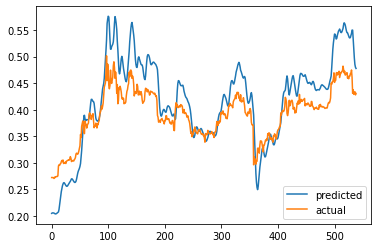

In [9]:
test_data=scaled_data[int(len(scaled_data)*0.8):len(scaled_data)]

model_inputs=scaled_data[len(scaled_data)-len(test_data)-prediction_days:]
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.fit_transform(model_inputs)
x_train=list(x_train)
x_test=[]
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test=np.array(x_test)
prediction_prices=model.predict(x_test)
test_data=scaler.inverse_transform(test_data)
prediction_prices=scaler.inverse_transform(prediction_prices)

plt.plot(prediction_prices,label='predicted')
plt.plot(test_data,label='actual')
plt.legend()

10/10 [==============================] - 1s 2ms/step


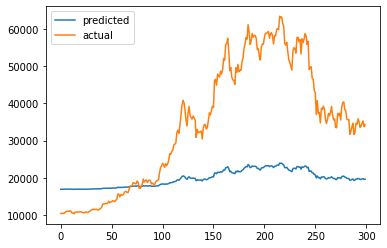

In [10]:
real_data=btc_data[int(len(btc_data)*0.9):len(btc_data)]
real_data=pd.DataFrame(real_data)
real_data.index=np.arange(int(len(btc_data)*0.9),len(btc_data))
real_data=real_data['Close']
real_data=scaler.fit_transform(real_data.values.reshape(-1,1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
real_data=scaler.inverse_transform(real_data)

plt.plot(prediction,label='predicted')
plt.plot(real_data,label='actual')
plt.legend()

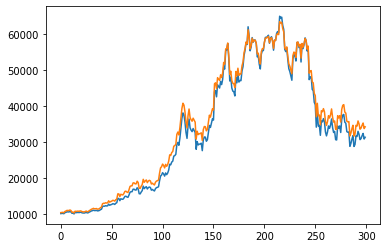

In [12]:

scaler= MinMaxScaler(feature_range=(10000,65000))
plt.plot(scaler.fit_transform(prediction),label='scaled predicted')
plt.plot(real_data,label='actual')